# Evaluating the Flat Universe Model with Type 1A Supernovae and Galaxies
Caitlin Begbie and Emma Yu\
ASTRON C161 Spring 2024\
Professor Kasen

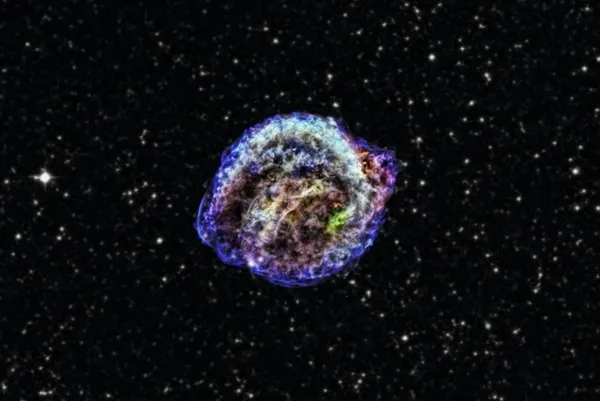

#### Importing Packages

In [155]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import PchipInterpolator

## Why Type 1a Supernova?

We decided to use the redshift and apparent magnitude data of Type 1a Supernova for two reasons. First, Type 1A supernovae have uniform luminosity, meaning they all have vitually the same absolute magnitude ($M$ ~ -19.5). Secondly, Type 1A supernovae data is publicly available online, meaning we were able to use actual observation data in our project and give an accurate view of the universe we live in.

## Deriving the $m-z$ relation in the Flat Universe Model

The general equation for the apparent magnitude $m$ is:
            
$\Huge m-M = 5log_{10}[\frac{d_L}{1 Mpc}]+25$ 

Where $d_L$ is the *luminosity distance*. In a metric using the comoving coordinate $r$, the luminosity distance is:

$\Huge d_L = a_0r(1+z)$

To solve for the comoving coordinate $r$ in terms of $z$ we begin with the Friedmann-Robertson-Walker Metric:

$\Huge ds^2 = -c^2dt^2 + a^2(t)[\frac{dr^2}{1-kr^2} + \Omega(\theta, \phi)] $

Where $k=0$ for a flat universe. We will also set $ds^2=\Omega(\theta, \phi)=0$ since we will consider the radial path of light. The equation then becomes:

$\Huge cdt = \pm a(t)dr$

We then integrate $r$ from $t'=0$ to $t'=t$:

$\Huge \int_{0}^{t} \frac{cdt'}{a(t')} = \int_{0}^{r}dr' = r$

To get $r$ in terms of $z$, we need to find the relation between $dt$ and $dz$. To do this we use the following equations:

$\Huge H(z) = \frac{da}{dt}\frac{1}{a}= \frac{da}{dz}\frac{dz}{dt}\frac{1+z}{a_0}$

Since $\Huge a=\frac{a_0}{1+z}$, $\Huge da=-\frac{a_0dz}{(1+z)^2}$

Substituting these into each other we end up with:

$\Huge dt = -\frac{dz}{H(z)(1+z)}$

Finally, using this to substitute $dt$ for $dz$:

$\Huge r = \int_{z}^{0} \frac{c(1+z')}{a_0}\frac{-dz'}{H(z')(1+z')} = {\frac{c}{a_0H_{0}}}\int_{0}^{z} \frac{H_0}{H(z')} dz'$

Plugging this back into our expression for $d_L$:

$\Huge d_L = a_0r(1+z) = {\frac{c}{H_{0}}}(1+z)\int_{0}^{z} \frac{H_0}{H(z')} dz'$

Therefore, in a flat universe, we would expect the luminosity distance and redshift of an object to follow the following relation:

$\Huge d_L = {\frac{c}{H_{0}}}(1+z)\int_{0}^{z} 1/E(z') \,dz' $

Where we define a new funcion $E(z)$ to be $H(z)/H_0$. 

Our final expression for the relation between $m$ (apparent magnitude) and $z$ (redshift) then becomes:

$\Huge m-M = 5log_{10}[\frac{{\frac{c}{H_{0}}}(1+z)\int_{0}^{z}\frac{1}{E(z')} \,dz'}{1 Mpc}]+25$ 

Since Type 1a Supernovae all have an absolute magnitude of about $M \thickapprox -19.5$, our equation becomes:

$\Huge m = 5log_{10}[\frac{{\frac{c}{H_{0}}}(1+z)\int_{0}^{z}\frac{1}{E(z')} \,dz'}{1 Mpc}]+5.5$ 


## Interpolating E(z)

According to the paper by [A Reiss, et al.](https://iopscience.iop.org/article/10.3847/1538-4357/aaa5a9/pdf), one way to determine the $E(z)$ function is to pick a set of experimentally determined values of $E(z)$ at different redshifts and interpolate a function to fit the points. For this analysis, we will use data collected from the [Pantheon and MCT Sn Ia programs](https://arxiv.org/abs/1710.00845). Following the steps taken in [A Reiss, et al.](https://iopscience.iop.org/article/10.3847/1538-4357/aaa5a9/pdf), we will fit a piecewise-cubic Hermite interpolating polynomial (PCHIP) to the following values of $E(z)$: 

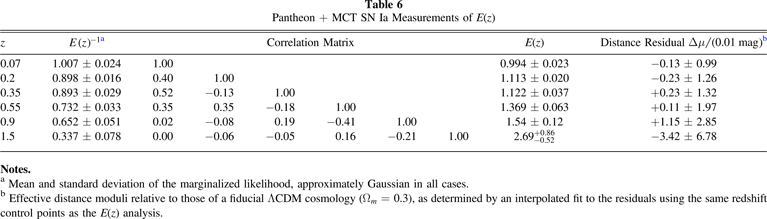

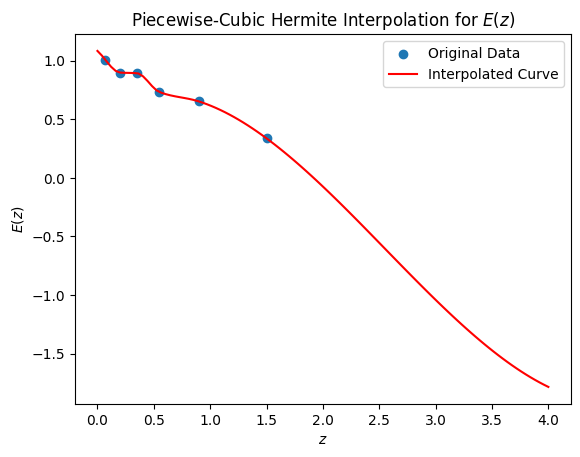

In [137]:
# E(z) data points extracted from the table
z = np.array([0.07, 0.2, 0.35, 0.55, 0.9, 1.5])
E = np.array([1.007, 0.898, 0.893, 0.732, 0.652, 0.337])

# Create a PchipInterpolator object
interpolator = PchipInterpolator(z, E)

# Define the range of z values for interpolation
z_values = np.linspace(0, 4, 100)

# Interpolate the y values for the given x values
E_values = interpolator(z_values)

# Plot the original data points and the interpolated curve
plt.scatter(z, E, label="Original Data")
plt.plot(z_values, E_values, label="Interpolated Curve", color="red")
plt.xlabel("$z$")
plt.ylabel("$E(z)$")
plt.title("Piecewise-Cubic Hermite Interpolation for $E(z)$")
plt.legend()
plt.show()

Since we mainly care about the integral of $1/E(z)$ instead of $E(z)$ itself, we can use the interpolation function to compute the antiderivative of E(z) between a specified range of z values:

In [138]:
# Define the range of x values for integration
x_values = np.linspace(0, 4, 100)

# Interpolate the y values for the given x values
y_values = interpolator(x_values)

# Calculate the antiderivative (integral) using the trapezoidal rule
integral_values = np.trapz(y_values, x_values)
antiderivative = np.trapz(y_values, x_values)


# From this, we can define a function that would return our predicted m for a given z value
def e_function(z):
    # Hubble constant in km/s/mpc
    H0 = 69.8
    # c in km/s
    c = 299792

    # Define the range of x values for integration
    x_values = np.linspace(0, z, 100)
    # Interpolate the y values for the given x values
    y_values = interpolator(x_values)
    # Calculate the antiderivative (integral) using the trapezoidal rule
    integral_value = np.trapz(1 / y_values, x_values)

    return 5 * np.log10(c / H0 * (1 + z) * integral_value) + 5.5

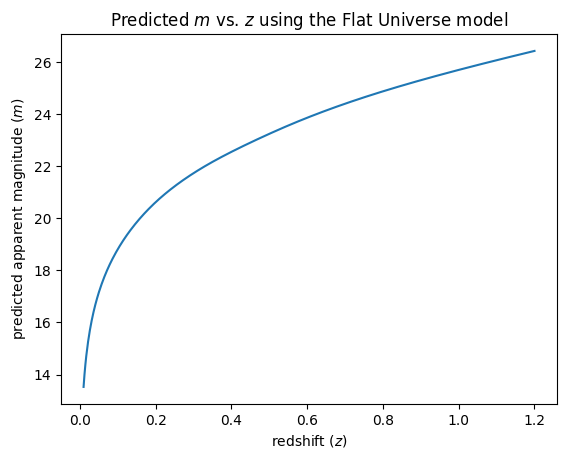

In [139]:
# Define a range of z values to plot
test_z = np.linspace(0.01, 1.2, 500)
# Use our new function to generate our predictions for m based on the equation derived earlier
pred_m = []
for z in test_z:
    pred_m.append(e_function(z))

# Plot the new function
plt.plot(test_z, pred_m)
plt.title("Predicted $m$ vs. $z$ using the Flat Universe model")
plt.xlabel("redshift ($z$)")
plt.ylabel("predicted apparent magnitude ($m$)")
plt.show()

### Unpacking Our Supernova Data

We sourced our Type 1a Supernova data from a Wolfram Alpha educational notebook which got its data from the following paper: [Type Ia Supernova Distances at Redshift >1.5 from the Hubble Space Telescope Multicycle Treasury Programs: The Early Expansion Rate](https://iopscience.iop.org/article/10.3847/1538-4357/aaa5a9/pdf).

The data we're interested in is the redshift and apparent magnitudes of the supernovae which came from the CANDELS and CLASH programs run on the Hubble Space Telescope.

In [140]:
# Open the CSV file containing the supernova data
file_path = "sn_plottingdata_cleaned.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df

,supernova name,redshift,magnitude,stretch,color
0,'03D1au',0.503084,23.001698,1.273191,-0.012353
1,'03D1aw',0.580724,23.573937,0.974346,-0.025076
2,'03D1ax',0.494795,22.960139,-0.728837,-0.099683
3,'03D1bp',0.345928,22.398137,-1.155110,-0.040581
4,'03D1co',0.677662,24.078115,0.618820,-0.039380
...,...,...,...,...,...
727,'sn2007co',0.027064,16.504006,-0.137806,0.105288
728,'sn2007cq',0.025468,15.797848,-0.657941,-0.060805
729,'sn2007f',0.023810,15.895501,0.618766,-0.055411
730,'sn2007qe',0.023867,16.068268,0.760605,0.052186


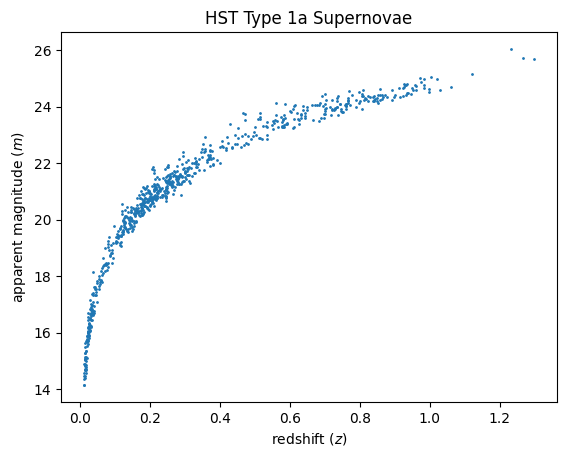

In [136]:
# Plot the redshift and apparent magnitude data from the table
plt.plot(df["redshift"], df["magnitude"], ".", ms=2)
plt.ylabel("apparent magnitude ($m$)")
plt.xlabel("redshift ($z$)")
plt.title("HST Type 1a Supernovae")
plt.show()

Lastly, we plot our function from the flat universe model against this data to see how well it fits.

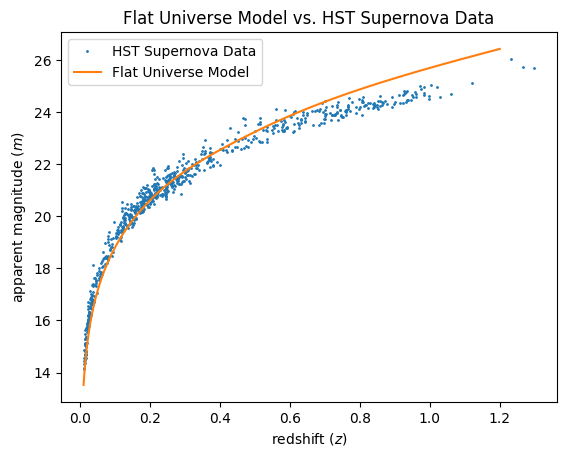

In [141]:
plt.plot(df["redshift"], df["magnitude"], ".", ms=2, label="HST Supernova Data")
plt.plot(test_z, pred_m, label="Flat Universe Model")
plt.ylabel("apparent magnitude ($m$)")
plt.xlabel("redshift ($z$)")
plt.legend()
plt.title("Flat Universe Model vs. HST Supernova Data")
plt.show()

### Performing a Reduced Chi-Squared Analysis on our Supernovae Fit

In [142]:
# create an array for predicted m values using z values in supernova data
super_m = []
for x in df["redshift"]:
    super_m.append(e_function(x))

# calculating chi-squared statistic
chi_squared = np.sum(((df["magnitude"] - super_m) ** 2) / super_m)
chi_squared

9.195785336317822

In [143]:
# find the number of categories
super_m = np.array(super_m)
r = len(np.unique(df["magnitude"]))
c = len(np.unique(super_m))

# find the degrees of freedom
deg_free = (r - 1) * (c - 1)

# calculate the reduced chi squared statistic
red_chi_squared = chi_squared / deg_free
print("The reduced chi_squared value for our fit is " + str(red_chi_squared))

The reduced chi_squared value for our fit is 1.723251192083995e-05


Since we obtained a very minimal reduced chi-squared value, we can conclude that our model for a flat universe fits the observed supernovae data incredibly well. This can also be seen in the graph of our equation to predict apparent magnitude $m$ relative to our data, where it is very clear that the two are correlated. Thus, based on this data, we can effectively determine that we are living in a flat universe.

## How would this process look if we consider galaxies?

From the Type 1A supernovae data, it was clear that a flat universe makes sense. We were also curious to determine if this result still holds for galaxies. We were able to obtain Hubble galaxy data from the [SAI Supernova Catalog](http://stella.sai.msu.su/sncat/dbstructure.html) and follow a similar process. This process was a little more complicated, however, because we could not assume that the absolute magnitudes were the same for all of the galaxies.

In [144]:
# Reading the galaxy_plotting_data.csv file using pandas
sn_file = pd.read_csv("galaxy_plottingdata.csv", on_bad_lines="skip")

We needed to get rid of the rows in the file that had empty cells or NAN values for the redshift and gal_mag columns. We did this as follows:

In [145]:
# Replace strings consisting only of spaces with NaN values in the specified columns
sn_file["redshift"] = sn_file["redshift"].replace(r"^\s*$", pd.NA, regex=True)
sn_file["gal_mag"] = sn_file["gal_mag"].replace(r"^\s*$", pd.NA, regex=True)
sn_file["gal_log10d"] = sn_file["gal_log10d"].replace(r"^\s*$", pd.NA, regex=True)

# Drop rows with NaN values in the three specified columns
sn_file = sn_file.dropna(subset=["redshift", "gal_mag", "gal_log10d"])

# Reset index after dropping rows
sn_file = sn_file.reset_index(drop=True)

# Turn the columns from strings into floats
sn_file["gal_mag"] = sn_file["gal_mag"].astype(float)
sn_file["redshift"] = sn_file["redshift"].astype(float)
sn_file["gal_log10d"] = sn_file["gal_log10d"].astype(float)

In [146]:
len(sn_file["redshift"])

5188

#### Defining Variables

The SAI Catalog provides the apparent magnitudes and $log_{10}(d)$ values. From this, we can calculate the absolute magnitudes of each individual galaxy.

In [147]:
# apparent magnitude of galaxies
g_mag = sn_file["gal_mag"]
g_mag = np.array(g_mag)

# log10(d) for galaxies
log_gdist = sn_file["gal_log10d"]

# absolute magnitude of galaxies
abs_mag = []
for n in range(len(g_mag)):  # Iterate over the indices of g_mag
    abs_mag.append(g_mag[n] - (5 * log_gdist[n] + 25))

# find average absolute magnitude
av_ab = np.sum(abs_mag) / len(abs_mag)

# redshift of galaxies
redshift = sn_file["redshift"]

#### Creating an $E(z)$ Function for Galaxies

We followed a similar process to create an $E(z)$ function as we did considering the supernovae data, but had to account for the fact that absolute magnitude was not constant. We did this by finding the average absolute magnitude value of all of the galaxies to produce a smooth curve. We then plugged this value into a new $E(z)$ function to fit the galaxy data.

In [148]:
def e_gfunction(z):
    # Hubble constant in km/s/mpc
    H0 = 69.8
    # c in km/s
    c = 299792

    # Define the range of x values for integration
    x_gvalues = np.linspace(0, z, 100)
    # Interpolate the y values for the given x values
    y_gvalues = interpolator(x_gvalues)
    # Calculate the antiderivative (integral) using the trapezoidal rule
    integral_value = np.trapz(1 / y_gvalues, x_gvalues)

    return 5 * np.log10(c / H0 * (1 + z) * integral_value) + (25 + av_ab)

In [149]:
# generate an array of predicted m values for the galaxy redshift values
pred_gm = []
for r in redshift:
    pred_gm.append(e_gfunction(r))

# make the array floats
pred_gm = np.array(pred_gm)

# put redshift data set into increasing order and reorder output array to match new indices
sorted_indices = np.argsort(redshift)
sorted_redshift = redshift[sorted_indices]
sorted_gm = pred_gm[sorted_indices]

/var/folders/nk/c34tgrnx3b74jct4hqj_1qq00000gn/T/ipykernel_5296/2538492770.py:14: RuntimeWarning: invalid value encountered in log10
  return 5 * np.log10(c / H0 * (1 + z) * integral_value) + (25 + av_ab)


#### Plotting Magnitude and Redshift of Galaxies

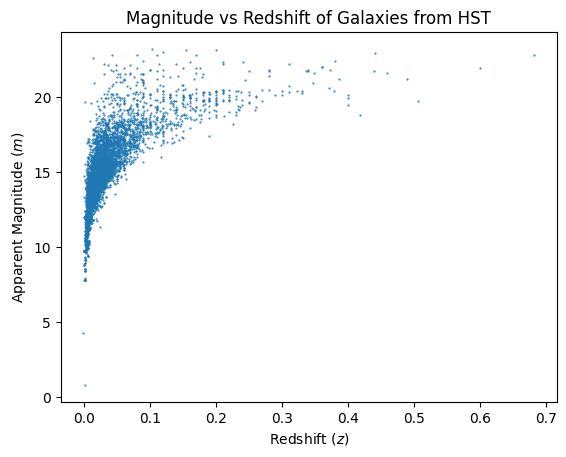

In [150]:
plt.plot(redshift, g_mag, ".", ms=1)
plt.title("Magnitude vs Redshift of Galaxies from HST")
plt.xlabel("Redshift ($z$)")
plt.ylabel("Apparent Magnitude ($m$)")
plt.show()

#### Plotting the Flat Universe Model prediction

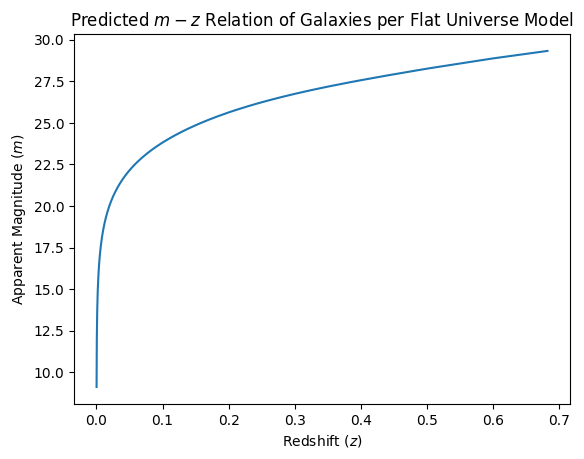

In [116]:
plt.plot(sorted_redshift, sorted_gm)
plt.title("Predicted $m-z$ Relation of Galaxies per Flat Universe Model")
plt.xlabel("Redshift ($z$)")
plt.ylabel("Apparent Magnitude ($m$)")
plt.show()

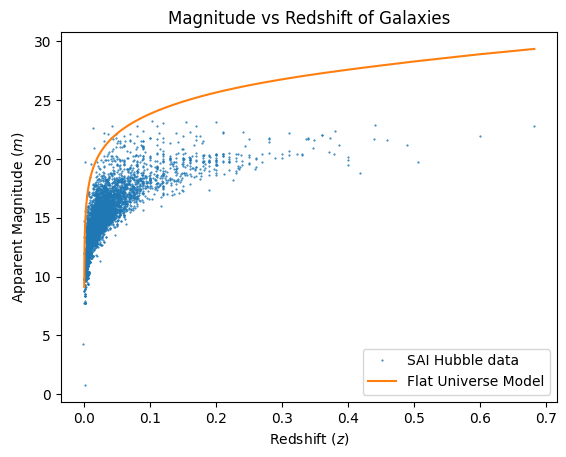

In [151]:
plt.plot(redshift, g_mag, ".", ms=1, label="SAI Hubble data")
plt.plot(sorted_redshift, sorted_gm, label="Flat Universe Model")
plt.title("Magnitude vs Redshift of Galaxies")
plt.xlabel("Redshift ($z$)")
plt.ylabel("Apparent Magnitude ($m$)")
plt.legend()
plt.show()

### Performing A Reduced Chi Squared Analysis on the Galaxy Data

In [152]:
# create a mask for NaN values in pred_gm
mask = ~np.isnan(pred_gm)

# apply the mask to both arrays
filtered_pred_gm = pred_gm[mask]
filtered_gmag = g_mag[mask]

# calculating chi-squared statistic
gchi_squared = np.sum(((filtered_gmag - filtered_pred_gm) ** 2) / filtered_pred_gm)
gchi_squared

7259.199131207325

In [153]:
# find the number of categories
f = len(np.unique(g_mag))
g = len(np.unique(pred_gm))

# find the degrees of freedom
gdeg_free = (f - 1) * (g - 1)

# calculate the reduced chi squared statistic
gred_chi_squared = gchi_squared / gdeg_free
print("The reduced chi_squared value for our fit is " + str(gred_chi_squared))

The reduced chi_squared value for our fit is 0.0007606448728563716


From this result, we can conclude that the fit for the data is relatively well-done. As shown in the graph, it makes sense for the universe to be flat, as this is the curve that the data relatively fits. Our fit however is not as nicely done as the supernova data, as we had to take some liberties in finding an average absolute magnitude value, and the data is not filtered through as the supernova data was.

## Conclusion

Overall, in considering both of our data sets and our flat universe model curve fits, it is logical to assume that we live in a flat universe.